We are dealing with regression problem.

*Source of the dataset:* https://www.kaggle.com/neuromusic/avocado-prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data loading and first look at it

In [4]:
data = pd.read_csv('avocado.csv', index_col = 0)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Indexes are not unique so I have to reindex this DataFrame.

In [5]:
data.index = np.arange(1, len(data)+1)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
4,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18246,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18247,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18248,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
print(data.dtypes)

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


Date is the object instead of datetime.

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


We have 13 features. Here is the desciption of the relevant ones:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado (our label)
- type - conventional or organic
- year - the year of production
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


## Exploratory Data Analysis

#### Handling missing values

In [9]:
print(data.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


There are no null values. This dataset seems to be cleared from missing values before.

#### Dealing with outliers

I can assume that outliers won't be in the columns representing categorial features - date, region and type.

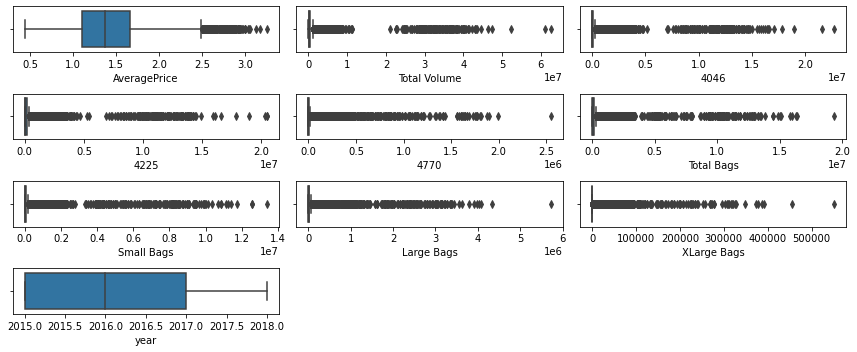

In [10]:
columns = data.columns.drop(['Date', 'type', 'region'])
plt.figure(figsize = (12, 5))
for name in columns:
    plt.subplot(4, 3, list(columns).index(name)+1)
    sns.boxplot(x = data[columns][name])
plt.tight_layout()
plt.show()

I'm gonna use IQR method to deal with outliers.

IQR tells us the variation in the dataset. Any value, which is beyond the range of Q3 + 1.5 *  IQR to  Q1 - 1.5 * IQR is treated as an outlier. Interquartile range is Q3 - Q1. Q1 represents the 25th percentile of the data and Q3 represents the 75th percentile of the data.

In [11]:
def is_outlier_iqr(dt):
    q1 = dt.quantile(.25)['AveragePrice']
    q3 = dt.quantile(.75)['AveragePrice']
    iqr = round(q3 - q1, 2)
    higher_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    df_out = dt.loc[(dt['AveragePrice'] > lower_boundary) & (dt['AveragePrice'] < higher_boundary)]
    return df_out

data = is_outlier_iqr(data)
data.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00
mean,1.39,860337.35,296377.10,298500.65,23104.00,242353.50,184269.98,54941.14,3142.38,2016.14
std,0.38,3472312.37,1271906.52,1210671.87,108056.60,991614.32,750237.75,245309.84,17791.92,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.09,11014.39,888.12,3017.74,0.00,5323.76,3006.91,137.69,0.00,2015.00
50%,1.36,111838.46,9114.65,30128.49,198.75,41373.42,27308.82,2747.00,0.00,2016.00
75%,1.65,439987.40,113482.67,153698.05,6401.72,112564.18,84584.04,22589.17,141.82,2017.00
max,2.49,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


There were 209 samples marked as outliers.

#### Feature engineering of datetime variable

Datetime fields require Feature Engineering, to turn them from data to insightful information, that can be used by machine learning models.

Let's create new features - year, month, week, day, day of week, day of year.

In [12]:
pd.options.mode.chained_assignment = None # no warning messages

data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['week'] = data['Date'].dt.isocalendar().week.astype('int64')
data['dayofmonth'] = pd.DatetimeIndex(data['Date']).day
data['dayofweek'] = pd.DatetimeIndex(data['Date']).dayofyear
data['dayofweek'] = pd.DatetimeIndex(data['Date']).weekday

data_copy = data.copy() # copy with date for time series representation several lines below
data.drop(['Date'], axis = 1, inplace = True)

data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,week,dayofmonth,dayofweek
1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,52,27,6
2,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,51,20,6
3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,50,13,6
4,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,49,6,6
5,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,48,29,6


In [13]:
data.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,week,dayofmonth,dayofweek
count,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.0
mean,1.39,860337.35,296377.10,298500.65,23104.00,242353.50,184269.98,54941.14,3142.38,2016.14,6.16,25.16,15.66,6.0
std,0.38,3472312.37,1271906.52,1210671.87,108056.60,991614.32,750237.75,245309.84,17791.92,0.94,3.54,15.51,8.77,0.0
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00,1.00,1.00,1.00,6.0
25%,1.09,11014.39,888.12,3017.74,0.00,5323.76,3006.91,137.69,0.00,2015.00,3.00,11.00,8.00,6.0
50%,1.36,111838.46,9114.65,30128.49,198.75,41373.42,27308.82,2747.00,0.00,2016.00,6.00,24.50,16.00,6.0
75%,1.65,439987.40,113482.67,153698.05,6401.72,112564.18,84584.04,22589.17,141.82,2017.00,9.00,39.00,23.00,6.0
max,2.49,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00,12.00,53.00,31.00,6.0


As we can see, every price has been measured on Saturday, so this new column ‘dayofweek’ has no sense - I will drop it.

In [14]:
data.drop(['dayofweek'], axis = 1, inplace = True)

#### Distributions of certain numerical features and target

Let's find out what is the distribution of the target variable, which is a continuous one, so I will use histogram to show this one.

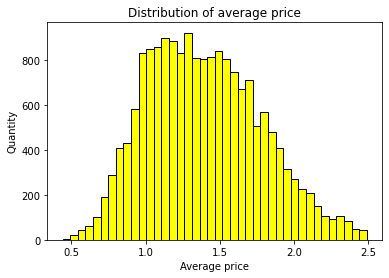

In [15]:
plt.hist(data['AveragePrice'], color = 'yellow', edgecolor = 'black', bins = 40)
plt.title("Distribution of average price")
plt.xlabel("Average price")
plt.ylabel("Quantity")
plt.show()

Now, let's focus on features.

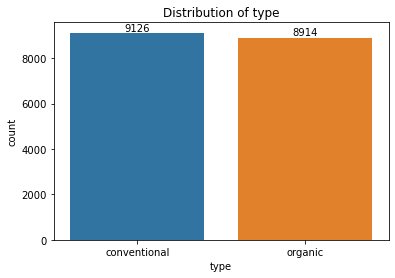

In [16]:
ax = sns.countplot(x = 'type', data = data)
ax.bar_label(ax.containers[0])
plt.title("Distribution of type")
plt.show()

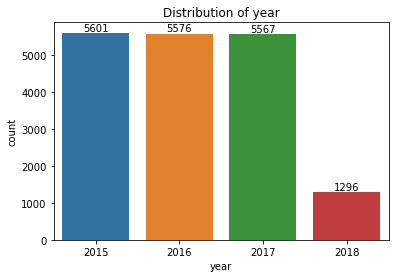

In [17]:
ax = sns.countplot(x = 'year', data = data)
ax.bar_label(ax.containers[0])
plt.title("Distribution of year")
plt.show()

In [18]:
print(data['region'].value_counts())

Albany                 338
Indianapolis           338
Louisville             338
Midsouth               338
Nashville              338
Northeast              338
NorthernNewEngland     338
Philadelphia           338
Pittsburgh             338
Plains                 338
RichmondNorfolk        338
Roanoke                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Syracuse               338
TotalUS                338
LosAngeles             338
NewOrleansMobile       338
Houston                338
CincinnatiDayton       338
Boston                 338
HarrisburgScranton     338
Chicago                338
GreatLakes             338
BaltimoreWashington    338
Detroit                338
Denver                 338
DallasFtWorth          338
Columbus               338
NewYork                337
West                   336
GrandRapids            336
California             336
PhoenixTucson          336
Orlando                335
Jacksonville           334
M

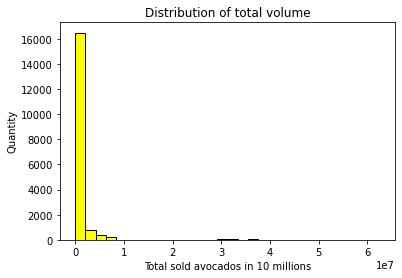

In [19]:
plt.hist(data['Total Volume'], color = 'yellow', edgecolor = 'black', bins = 30)
plt.title("Distribution of total volume")
plt.xlabel("Total sold avocados in 10 millions")
plt.ylabel("Quantity")
plt.show()

**Conclusions:**

- majority of average price is in interval [1.0; 1.75]
- type has almost the discrete uniform distribution
- there are just about the same number of examples from years 2015, 2016, 2017 and we have significantly less examples from year 2018
- region has the discrete uniform distribution
- nearly every example has total volume from the interval [0; 1 000 000]

#### Average price as a time series

In [20]:
data_timeseries = data_copy.iloc[:, :2].set_index('Date')

In [21]:
data_timeseries = data_timeseries.groupby(data_timeseries.index).mean().round(2)
data_timeseries.head()

,AveragePrice
Date,
2015-01-04,1.30
2015-01-11,1.37
2015-01-18,1.39
2015-01-25,1.40
2015-02-01,1.25


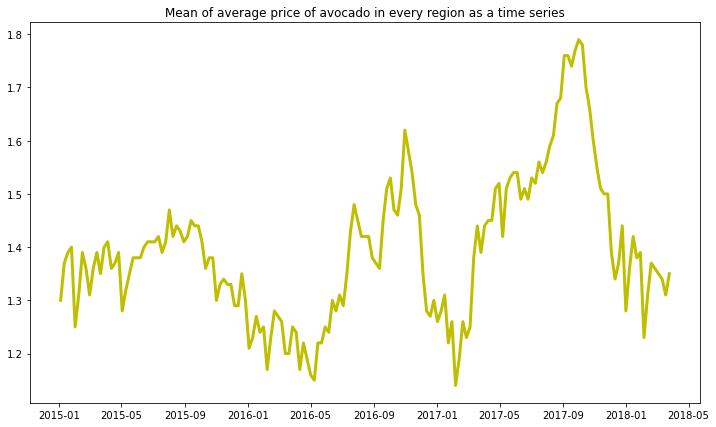

In [22]:
plt.figure(figsize = (12, 7), edgecolor = 'yellow')
plt.plot(data_timeseries, color = 'y', linewidth = 3)
plt.title("Mean of average price of avocado in every region as a time series")
plt.show()

#### Correlation matrix analysis with feature selection

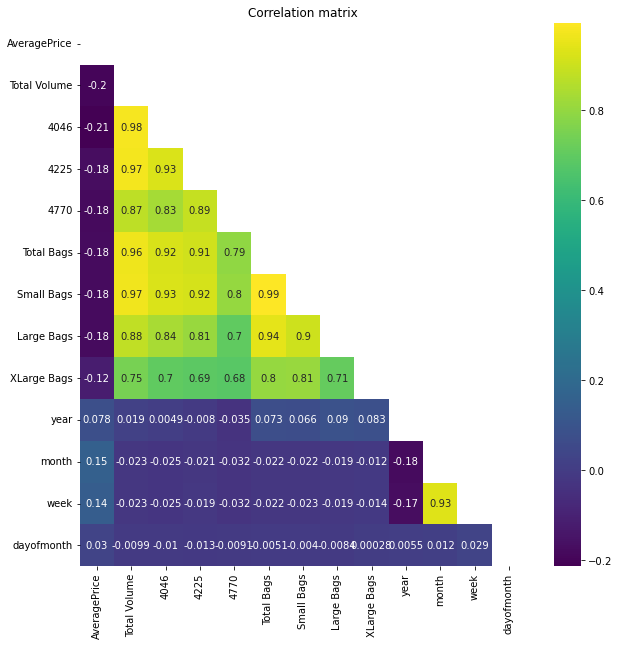

In [23]:
corr = data.corr()
f, ax = plt.subplots(figsize = (10, 10))
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, mask = mask, cmap = 'viridis')
ax.set_title('Correlation matrix')
plt.show()

In [24]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,week,dayofmonth
1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,52,27
2,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,51,20
3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,50,13
4,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,49,6
5,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,48,29


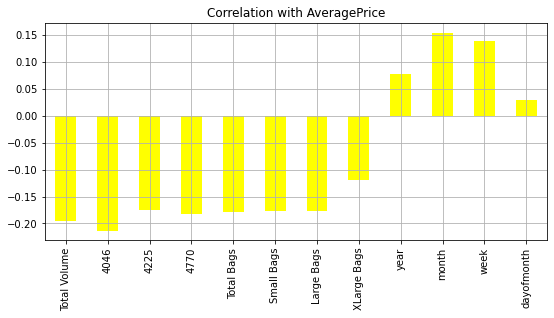

In [25]:
data.drop('AveragePrice', axis = 1).corrwith(data['AveragePrice']).plot(kind = 'bar',
                                                       grid = True,
                                                       figsize = (9, 4),
                                                       title="Correlation with AveragePrice",
                                                       color = 'yellow')
plt.show()

**Conclusions:**

- year and dayofmonth have negligible correlation with target, so I will drop them in the next step(*)
- the rest has significant (mostly inverse) correlation with Average Price

(*) I assume that significant correlation begins in .1 or -.1 correlation coefficient

In [26]:
data = data.drop(['year', 'dayofmonth'], axis = 1)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,week
1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12,52
2,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12,51
3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12,50
4,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12,49
5,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11,48


#### Splitting a dataset

In [27]:
y = data['AveragePrice']
X = data.drop(['AveragePrice'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split

# 80(train) | 10(valid) | 10(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Dealing with categorical variables

In [29]:
cat_cols = data.columns.where(data.dtypes == 'object').dropna()
cat_cols

Index(['type', 'region'], dtype='object')

In [30]:
X_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,week
1599,309143.83,2352.11,252306.55,82.02,54403.15,54288.70,114.45,0.0,conventional,NorthernNewEngland,4,14
17959,215742.94,11683.16,26922.85,162.73,176974.20,167900.81,9073.39,0.0,organic,Northeast,1,3
15797,5571.99,222.81,1495.17,0.00,3854.01,1209.49,2644.52,0.0,organic,Indianapolis,1,4
1804,79976.86,1820.06,44304.28,1309.41,32543.11,22762.11,9781.00,0.0,conventional,Pittsburgh,4,17
9410,1728.99,56.05,123.39,0.00,1549.55,1549.55,0.00,0.0,organic,BuffaloRochester,7,29


'type' has only 2 possible values, so we can use OneHotEncoder fot his feature. For 'region' the better solution will be Ordinal Encoding, because this feature can be unambiguously represented as integer for every example and it has too many possible values for OneHotEncoding.

In [31]:
# One Hot Encoding
X_train = pd.concat([X_train, pd.get_dummies(X_train['type'])], axis = 1)
X_test = pd.concat([X_test, pd.get_dummies(X_test['type'])], axis = 1)

X_train.drop(['type'], axis = 1, inplace = True)
X_test.drop(['type'], axis = 1, inplace = True)

# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype = np.intc)
X_train['region'] = ord_enc.fit_transform(X_train['region'].values.reshape(-1, 1))
X_test['region'] = ord_enc.transform(X_test['region'].values.reshape(-1, 1))

X_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month,week,conventional,organic
1599,309143.83,2352.11,252306.55,82.02,54403.15,54288.70,114.45,0.0,30,4,14,1,0
17959,215742.94,11683.16,26922.85,162.73,176974.20,167900.81,9073.39,0.0,29,1,3,0,1
15797,5571.99,222.81,1495.17,0.00,3854.01,1209.49,2644.52,0.0,19,1,4,0,1
1804,79976.86,1820.06,44304.28,1309.41,32543.11,22762.11,9781.00,0.0,34,4,17,1,0
9410,1728.99,56.05,123.39,0.00,1549.55,1549.55,0.00,0.0,5,7,29,0,1


#### Standard scaling

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_scaling = X_train.columns.difference(['Date', 'region', 'month', 'conventional', 'organic', 'week'])
X_train[col_scaling] = scaler.fit_transform(X_train[col_scaling])
X_test[col_scaling] = scaler.transform(X_test[col_scaling])

X_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month,week,conventional,organic
1599,-0.159114,-0.233983,-0.037006,-0.209847,-0.191295,-0.174750,-0.225344,-0.176465,30,4,14,1,0
17959,-0.186323,-0.226513,-0.223375,-0.209109,-0.065376,-0.020091,-0.188421,-0.176465,29,1,3,0,1
15797,-0.247549,-0.235687,-0.244401,-0.210597,-0.243225,-0.247006,-0.214917,-0.176465,19,1,4,0,1
1804,-0.225874,-0.234409,-0.209002,-0.198621,-0.213752,-0.217667,-0.185504,-0.176465,34,4,17,1,0
9410,-0.248668,-0.235821,-0.245535,-0.210597,-0.245592,-0.246543,-0.225816,-0.176465,5,7,29,0,1


## Applying machine learning algorithms

We are gonna compare 6 different ML algorithms for regression:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Polynomial Regression
- Random Forest
- Support Vector Machine

I will use GridSearchCV for hyperparameters tuning when it is necessary and for scoring I will use cross-validation.

### Linear Regression

##### Training the model

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

##### Results

In [34]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

print("Score from 5-fold cross-validation for Linear Regression: ", cross_val_score(lr, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5))
print("R2 score for Linear Regression: {:.2f}".format(r2_score(y_test, lr_pred)))

Score from 5-fold cross-validation for Linear Regression:  [-0.08636145 -0.0854386  -0.09105014 -0.07689645 -0.08320352]
R2 score for Linear Regression: 0.42


### Ridge Regression

##### Training the model with tuning the hyperparameters with GridSearchCV

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_estimator = Ridge()
parameters = {'alpha':[.01, 10]}
ridge = GridSearchCV(ridge_estimator, parameters, scoring = 'neg_mean_squared_error', cv = 5)

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

##### Results

In [36]:
print("Score from 5-fold cross-validation for Ridge Regression: ", cross_val_score(ridge, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5))
print("R2 score for Ridge Regression: {:.2f}".format(r2_score(y_test, ridge_pred)))

Score from 5-fold cross-validation for Ridge Regression:  [-0.08635195 -0.08537873 -0.09102756 -0.07688841 -0.08321186]
R2 score for Ridge Regression: 0.42


### Lasso Regression

##### Training the model with tuning the hyperparameters with GridSearchCV

In [37]:
from sklearn.linear_model import Lasso

lasso_estimator = Lasso()
parameters = {'alpha':[.01, 10]}
lasso = GridSearchCV(lasso_estimator, parameters, scoring = 'neg_mean_squared_error', cv = 5)

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

##### Results

In [38]:
print("Score from 5-fold cross-validation for Lasso Regression: ", cross_val_score(lasso, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5))
print("R2 score for Lasso Regression: {:.2f}".format(r2_score(y_test, lasso_pred)))

Score from 5-fold cross-validation for Lasso Regression:  [-0.08837738 -0.08692612 -0.09310837 -0.08037576 -0.08527959]
R2 score for Lasso Regression: 0.40


### Polynomial Regression

##### Training the model

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([('polynomial', PolynomialFeatures(degree = 2)), ('modal', LinearRegression())])

pipe.fit(X_train, y_train)
poly_pred = pipe.predict(X_test)

##### Results

In [40]:
print("Score from 5-fold cross-validation for Polynomial Regression: ", cross_val_score(pipe, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5))
print("R2 score for Polynomial Regression: {:.2f}".format(r2_score(y_test, poly_pred)))

Score from 5-fold cross-validation for Polynomial Regression:  [-0.30711636 -0.0828331  -0.10019372 -0.07897926 -0.09067225]
R2 score for Polynomial Regression: 0.47


### Random Forest

##### Training the model with tuning the hyperparameters with GridSearchCV

In [41]:
from sklearn.ensemble import RandomForestRegressor

parameters= {"n_estimators" : [10, 50, 100],
             "max_depth" : [None, 1, 2, 3],
             "bootstrap": [True, False]}

rfr = GridSearchCV(RandomForestRegressor(), parameters, scoring = 'neg_mean_squared_error')
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)

In [42]:
print("Score from 3-fold cross-validation for Random Forest: ", cross_val_score(rfr, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 3))
print("R2 score for Random Forest: {:.2f}".format(r2_score(rfr_predict, poly_pred)))

Score from 3-fold cross-validation for Random Forest:  [-0.03727002 -0.04076398 -0.03636382]
R2 score for Random Forest: 0.60


### Support Vector Machine

##### Training the model with tuning the hyperparameters with GridSearchCV

In [43]:
from sklearn.svm import SVR

parameters = {
    "C": [10, 100, 1000]
}# kernel = rbf by default

svr = GridSearchCV(SVR(), parameters, scoring = 'neg_mean_squared_error')
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)

##### Results

In [44]:
print("Score from 3-fold cross-validation for Support Vector Machine: ", cross_val_score(svr, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 3))
print("R2 score for Support Vector Machine: {:.2f}".format(r2_score(svr_predict, poly_pred)))

Score from 3-fold cross-validation for Support Vector Machine:  [-0.0756239  -0.07890312 -0.07623626]
R2 score for Support Vector Machine: 0.86


### Conclusions

Random Forest Regressor and SVR have the lowest MSE and the highest R2 score. Thus, we can state that they are the best regressors of the chosen ones for this data.